# Imports

In [1]:
using DataFrames
using CSV
using MLJ
using DecisionTree: print_tree
using Plots
using StatsBase

include("../../lib.jl")

ENV["LINES"]=30;
random = 123

123

In [2]:
mkdir("Figures/")

LoadError: IOError: mkdir: file already exists (EEXIST)

# Data

In [3]:
data = CSV.read("data.csv")

,1,2,3,4,5,6,7,8,9,10,11
,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64
1,3.919,2.6909,0,0,0,0,0,31.4,2,0,0
2,4.17,2.1144,0,0,0,0,0,30.8,1,1,0
3,3.932,3.2512,0,0,0,0,0,26.7,2,4,0
4,3.0,2.7098,0,0,0,0,0,20.0,0,2,0
5,4.236,3.3944,0,0,0,0,0,29.4,2,4,0
6,4.236,3.4286,0,0,0,0,0,28.6,2,4,0
7,5.0,5.0476,1,0,0,0,0,11.1,0,3,0
8,4.525,3.8301,0,0,0,0,0,31.6,3,2,0
9,4.596,3.0777,0,0,0,0,2,44.4,2,0,0


Look at class labels to see if dataset is imbalanced

In [4]:
label_counts = countmap(data[:(Class)])

Dict{String,Int64} with 2 entries:
  "RB"  => 356
  "NRB" => 699

In [5]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.33744075829383885
 0.6625592417061611

Get data ready for training

In [6]:
schema(data)

┌─────────┬─────────┬────────────┐
│ _.names │ _.types │ _.scitypes │
├─────────┼─────────┼────────────┤
│ 1       │ Float64 │ Continuous │
│ 2       │ Float64 │ Continuous │
│ 3       │ Int64   │ Count      │
│ 4       │ Int64   │ Count      │
│ 5       │ Int64   │ Count      │
│ 6       │ Int64   │ Count      │
│ 7       │ Int64   │ Count      │
│ 8       │ Float64 │ Continuous │
│ 9       │ Int64   │ Count      │
│ 10      │ Int64   │ Count      │
│ 11      │ Int64   │ Count      │
│ 12      │ Float64 │ Continuous │
│ 13      │ Float64 │ Continuous │
│ 14      │ Float64 │ Continuous │
│ 15      │ Float64 │ Continuous │
│ 16      │ Int64   │ Count      │
│ 17      │ Float64 │ Continuous │
│ 18      │ Float64 │ Continuous │
│ 19      │ Int64   │ Count      │
│ 20      │ Int64   │ Count      │
│ 21      │ Int64   │ Count      │
│ 22      │ Float64 │ Continuous │
│ 23      │ Int64   │ Count      │
│ 24      │ Int64   │ Count      │
│ 25      │ Int64   │ Count      │
│ 26      │ Int64   

In [7]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ 1       │ Float64                         │ Continuous    │
│ 2       │ Float64                         │ Continuous    │
│ 3       │ Int64                           │ Count         │
│ 4       │ Int64                           │ Count         │
│ 5       │ Int64                           │ Count         │
│ 6       │ Int64                           │ Count         │
│ 7       │ Int64                           │ Count         │
│ 8       │ Float64                         │ Continuous    │
│ 9       │ Int64                           │ Count         │
│ 10      │ Int64                           │ Count         │
│ 11      │ Int64                           │ Count         │
│ 12      │ Float64                         │ Continuous    │
│ 13      │ Float64                         │ Continuous    │
│ 14    

In [8]:
y, X = unpack(data, ==(:Class), colname->true)

(CategoricalValue{String,UInt32}["RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB"  …  "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB"], 1055×41 DataFrame. Omitted printing of 33 columns
│ Row  │ 1       │ 2       │ 3     │ 4     │ 5     │ 6     │ 7     │ 8       │
│      │ Float64 │ Float64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Float64 │
├──────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┼─────────┤
│ 1    │ 3.919   │ 2.6909  │ 0     │ 0     │ 0     │ 0     │ 0     │ 31.4    │
│ 2    │ 4.17    │ 2.1144  │ 0     │ 0     │ 0     │ 0     │ 0     │ 30.8    │
│ 3    │ 3.932   │ 3.2512  │ 0     │ 0     │ 0     │ 0     │ 0     │ 26.7    │
│ 4    │ 3.0     │ 2.7098  │ 0     │ 0     │ 0     │ 0     │ 0     │ 20.0    │
│ 5    │ 4.236   │ 3.3944  │ 0     │ 0     │ 0     │ 0     │ 0     │ 29.4    │
│ 6    │ 4.236   │ 3.4286  │ 0     │ 0     │ 0     │ 0     │ 0     │ 28.6    │
│ 7    │ 5.0     │ 5.0476  │ 1     │ 0     │ 0     │ 0     │ 0     │ 11.

Partition train and test data accoring to class labels

In [9]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=123, stratify=values(data[:Class])) # gives 70:30 split

([465, 562, 278, 619, 161, 972, 782, 321, 537, 760  …  12, 913, 471, 13, 1006, 802, 112, 840, 744, 261], [196, 586, 245, 77, 1028, 432, 215, 987, 137, 411  …  975, 610, 886, 848, 731, 1024, 805, 500, 659, 415])

In [10]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.33739837398373984
 0.6626016260162602

In [11]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.33753943217665616
 0.6624605678233438

In [12]:
standardizer = Standardizer()
stand = machine(standardizer, X[train,:]) #only want to standardize on training distribution
fit!(stand)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @167.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [13]:
models(matching(X,y))

6-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_name = MLJModels, ... )
 (name = RandomForestClassifier, package_name = DecisionTree, ... )
 (name = RandomForestClassifier, package_name = ScikitLearn, ... )

In [14]:
@load DecisionTreeClassifier verbosity=2

import MLJModels ✔
import DecisionTree ✔
import MLJModels.DecisionTree_ ✔


┌ Info: Loading into module "Main": 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/mUBFt/src/loading.jl:70


DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = false,
    merge_purity_threshold = 1.0,
    pdf_smoothing = 0.0,
    display_depth = 5) @733

## Decision trees
* Be sure to use some form of pruning. 
* You are not required to use information gain (for example, there is something called the GINI index that is sometimes used) to split attributes, but you should describe whatever it is that you do use.

1. https://alan-turing-institute.github.io/MLJ.jl/dev/transformers/#MLJModels.UnivariateDiscretizer
1. https://alan-turing-institute.github.io/MLJ.jl/dev/getting_started/#Getting-Started-1

### No post-pruning

In [15]:
dt = DecisionTreeClassifier(post_prune=false, display_depth=14)

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = false,
    merge_purity_threshold = 1.0,
    pdf_smoothing = 0.0,
    display_depth = 14) @751

In [16]:
Tree = machine(dt, X, y)

Machine{DecisionTreeClassifier} @967 trained 0 times.
  args: 
    1:	Source @925 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @657 ⏎ `AbstractArray{Multiclass{2},1}`


In [17]:
fit!(Tree, rows=train, verbosity=2)

┌ Info: Training Machine{DecisionTreeClassifier} @967.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Feature 36, Threshold 3.8005
L-> Feature 27, Threshold 2.2380000000000004
    L-> Feature 34, Threshold 2.5
        L-> Feature 9, Threshold 3.5
            L-> Feature 10, Threshold 1.5
                L-> Feature 36, Threshold 3.5940000000000003
                    L-> Feature 9, Threshold 1.5
                        L-> Feature 18, Threshold 1.1745
                            L-> Feature 2, Threshold 2.9217500000000003
                                L-> Feature 17, Threshold 0.9644999999999999
                                    L-> 1 : 2/2
                                    R-> Feature 30, Threshold 10.89
                                        L-> Feature 36, Threshold 2.952
                                            L-> Feature 2, Threshold 2.5458499999999997
                                                L-> 2 : 2/2
                                                R-> 1 : 1/1
                                            R-> 2 : 21/21
                                        R->

Machine{DecisionTreeClassifier} @967 trained 1 time.
  args: 
    1:	Source @925 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @657 ⏎ `AbstractArray{Multiclass{2},1}`


In [18]:
dt_acc = evaluate!(Tree, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:04


┌───────────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                 │
├───────────────┼───────────────┼────────────────────────────────────────────┤
│ cross_entropy │ 6.25          │ [6.55, 5.94, 6.55, 7.17, 5.94, 5.36]       │
│ acc           │ 0.827         │ [0.818, 0.835, 0.818, 0.801, 0.835, 0.851] │
└───────────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [[[2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 2.22e-16], [2.22e-16, 2.22e-16, ..., 36.0], [2.22e-16, 2.22e-16, ..., 2.22e-16], [36.0, 2.22e-16, ..., 2.22e-16], [2.22e-16, 36.0, ..., 2.22e-16]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [19]:
fitted_params(Tree) 
print_tree(Tree.fitresult[1])

Feature 36, Threshold 3.6745
L-> Feature 34, Threshold 2.5
    L-> Feature 1, Threshold 4.984
        L-> Feature 37, Threshold 2.7584999999999997
            L-> Feature 30, Threshold 9.927
                L-> Feature 36, Threshold 3.0015
                    L-> Feature 10, Threshold 0.5
                        L-> 2 : 16/16
                        R-> Feature 35, Threshold 0.5
                            L-> 1 : 2/2
                            R-> Feature 11, Threshold 0.5
                                L-> 2 : 6/6
                                R-> 1 : 1/1
                    R-> Feature 35, Threshold 0.5
                        L-> Feature 39, Threshold 8.226500000000001
                            L-> Feature 36, Threshold 3.2385
                                L-> Feature 31, Threshold 0.5555
                                    L-> 2 : 1/1
                                    R-> 1 : 12/12
                                R-> Feature 1, Threshold 4.7765
                          

In [20]:
fitted_params(Tree) 
# print_tree(Tree.fitresult[1])

(tree = Decision Tree
Leaves: 95
Depth:  16,
 encoding = Dict{CategoricalValue{String,UInt32},UInt32}("RB" => 0x00000002,"NRB" => 0x00000001),)

In [21]:
report(Tree)

(classes_seen = CategoricalValue{String,UInt32}["NRB", "RB"],
 print_tree = TreePrinter object (call with display depth),)

### Using Post-pruning

In [22]:
dt2 = DecisionTreeClassifier(post_prune=true, display_depth=14, merge_purity_threshold=0.7)

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = true,
    merge_purity_threshold = 0.7,
    pdf_smoothing = 0.0,
    display_depth = 14) @296

In [23]:
Tree2 = machine(dt2, X, y)

Machine{DecisionTreeClassifier} @011 trained 0 times.
  args: 
    1:	Source @172 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @955 ⏎ `AbstractArray{Multiclass{2},1}`


In [24]:
fit!(Tree2, rows=train, verbosity=2, force=true)

┌ Info: Training Machine{DecisionTreeClassifier} @011.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Feature 36, Threshold 3.8005
L-> Feature 27, Threshold 2.2380000000000004
    L-> Feature 34, Threshold 2.5
        L-> Feature 9, Threshold 3.5
            L-> Feature 10, Threshold 1.5
                L-> Feature 36, Threshold 3.5940000000000003
                    L-> Feature 9, Threshold 1.5
                        L-> Feature 18, Threshold 1.1745
                            L-> Feature 37, Threshold 2.1205
                                L-> Feature 13, Threshold 2.6014999999999997
                                    L-> 2 : 3/3
                                    R-> Feature 28, Threshold 0.0005
                                        L-> Feature 2, Threshold 2.9217500000000003
                                            L-> 2 : 4/4
                                            R-> Feature 22, Threshold 1.2080000000000002
                                                L-> 1 : 4/4
                                                R-> Feature 11, Threshold 1.5
                        

Machine{DecisionTreeClassifier} @011 trained 1 time.
  args: 
    1:	Source @172 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @955 ⏎ `AbstractArray{Multiclass{2},1}`


In [25]:
dt_acc = evaluate!(Tree2, resampling=CV(shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────────┬───────────────┬───────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                │
├───────────────┼───────────────┼───────────────────────────────────────────┤
│ cross_entropy │ 4.35          │ [4.09, 3.8, 5.28, 3.31, 3.99, 5.61]       │
│ acc           │ 0.83          │ [0.824, 0.841, 0.812, 0.83, 0.847, 0.829] │
└───────────────┴───────────────┴───────────────────────────────────────────┘
_.per_observation = [[[2.22e-16, 0.0684, ..., 2.22e-16], [2.22e-16, 0.0299, ..., 2.22e-16], [0.0117, 0.0117, ..., 2.22e-16], [0.08, 36.0, ..., 2.22e-16], [2.22e-16, 1.85, ..., 36.0], [36.0, 2.22e-16, ..., 36.0]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [26]:
# evaluate!(Tree2, resampling=CV(shuffle=true), measure=[tnr,tpr,fnr,fpr], verbosity=1, operation=predict_mode)

In [27]:
fitted_params(Tree2) 
# print_tree(Tree.fitresult[1])

(tree = Decision Tree
Leaves: 73
Depth:  14,
 encoding = Dict{CategoricalValue{String,UInt32},UInt32}("RB" => 0x00000002,"NRB" => 0x00000001),)

In [28]:
report(Tree2)

(classes_seen = CategoricalValue{String,UInt32}["NRB", "RB"],
 print_tree = TreePrinter object (call with display depth),)

### Standardized

In [29]:
Tree2 = machine(dt2, X_stand, y)

Machine{DecisionTreeClassifier} @317 trained 0 times.
  args: 
    1:	Source @685 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @389 ⏎ `AbstractArray{Multiclass{2},1}`


In [30]:
fit!(Tree2, rows=train, verbosity=2)

Feature 36, Threshold -0.12825137807558387
L-> Feature 27, Threshold 0.07521584446798363
    L-> Feature 34, Threshold 2.5
        L-> Feature 9, Threshold 3.5
            L-> Feature 10, Threshold 1.5
                L-> Feature 36, Threshold -0.3354530367869534
                    L-> Feature 9, Threshold 1.5
                        L-> Feature 18, Threshold 1.3981920479364356
                            L-> Feature 37, Threshold -0.7153635819025519
                                L-> Feature 27, Threshold -0.350236603546389
                                    L-> Feature 17, Threshold -0.8631916476700161
                                        L-> Feature 28, Threshold -0.21039206558781268
                                            L-> 2 : 3/3
                                            R-> Feature 13, Threshold -1.5241871872903379
                                                L-> 2 : 1/1
                                                R-> Feature 22, Threshold -0.313495105914733

┌ Info: Training Machine{DecisionTreeClassifier} @317.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{DecisionTreeClassifier} @317 trained 1 time.
  args: 
    1:	Source @685 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @389 ⏎ `AbstractArray{Multiclass{2},1}`


In [31]:
dt_acc = evaluate!(Tree2, resampling=CV(nfolds=6, shuffle=true), measure=[cross_entropy, acc], verbosity=1)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────────┬───────────────┬───────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                │
├───────────────┼───────────────┼───────────────────────────────────────────┤
│ cross_entropy │ 4.89          │ [6.81, 3.17, 5.27, 5.28, 4.29, 4.53]      │
│ acc           │ 0.805         │ [0.778, 0.869, 0.79, 0.784, 0.812, 0.794] │
└───────────────┴───────────────┴───────────────────────────────────────────┘
_.per_observation = [[[2.22e-16, 2.22e-16, ..., 0.0229], [0.015, 0.087, ..., 0.00889], [0.251, 2.22e-16, ..., 36.0], [2.22e-16, 2.22e-16, ..., 36.0], [0.0339, 2.22e-16, ..., 36.0], [2.22e-16, 2.22e-16, ..., 2.22e-16]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [32]:
fitted_params(Tree2) 
# print_tree(Tree.fitresult[1])

(tree = Decision Tree
Leaves: 79
Depth:  13,
 encoding = Dict{CategoricalValue{String,UInt32},UInt32}("RB" => 0x00000002,"NRB" => 0x00000001),)

In [33]:
report(Tree2)

(classes_seen = CategoricalValue{String,UInt32}["NRB", "RB"],
 print_tree = TreePrinter object (call with display depth),)

### GridSearch / RandomSearch

In [34]:
dt = DecisionTreeClassifier(post_prune=true, display_depth=14)
Tree = machine(dt, X_stand, y)

Machine{DecisionTreeClassifier} @314 trained 0 times.
  args: 
    1:	Source @544 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @917 ⏎ `AbstractArray{Multiclass{2},1}`


In [35]:
r = range(dt, :merge_purity_threshold, lower=0.50001, upper=1)
curve = learning_curve(Tree, 
                        range=r, 
#                         resampling=Holdout(fraction_train=0.7), 
                        resampling=CV(nfolds=6, shuffle=true), 
                        measure=cross_entropy, 
                        acceleration=CPUThreads(),
                        resolution = 1000)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @658.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 1000 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 1000 metamodels: 100%[=========================] Time: 0:01:06


(parameter_name = "merge_purity_threshold",
 parameter_scale = :linear,
 parameter_values = [0.50001, 0.5005104904904905, 0.501010980980981, 0.5015114714714715, 0.502011961961962, 0.5025124524524525, 0.503012942942943, 0.5035134334334335, 0.504013923923924, 0.5045144144144145  …  0.9954955855855856, 0.9959960760760761, 0.9964965665665666, 0.9969970570570571, 0.9974975475475476, 0.997998038038038, 0.9984985285285285, 0.998999019019019, 0.9994995095095095, 1.0],
 measurements = [2.283345137740369, 2.569099623480398, 2.0674293413945146, 1.6852806731915662, 2.151568742968663, 1.9030002579532719, 2.357952889422476, 2.205616232405042, 2.240772805589149, 1.9335963501748907  …  6.456650983730165, 7.141831472669388, 6.765401542793868, 6.491953479744397, 6.186323583311785, 6.28423437336231, 6.218310375280482, 6.013516890115043, 7.140856265597172, 5.9774342284430375],)

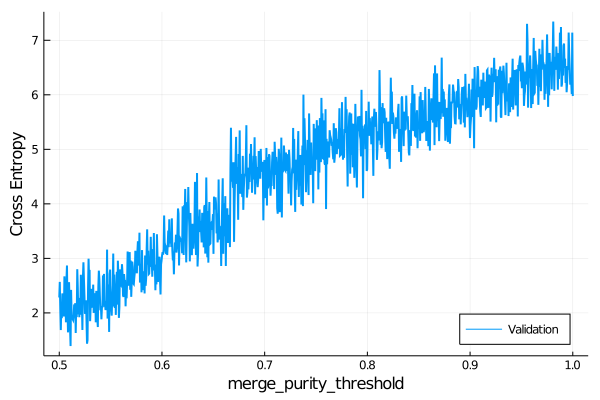

In [36]:
plot(curve.parameter_values,
     curve.measurements,
     xlab=curve.parameter_name,
     ylab="Cross Entropy",
     label="Validation", lw=2, legend=:bottomright)
# plot!(Net2.report.training_losses, label="Training", lw=2)

In [37]:
a = round(minimum(curve.measurements), digits=5)

1.39207

In [38]:
a = curve.parameter_values[argmin(curve.measurements)]

0.5110207907907908

In [39]:
param1 = :merge_purity_threshold

r1 = range(dt, param1, lower=0.50001, upper=1, scale=:linear)

MLJBase.NumericRange(Float64, :merge_purity_threshold, ... )

In [40]:
self_tuning_dt_model = TunedModel(model=dt,
                                    tuning=Grid(goal=1000),
                                    resampling=CV(nfolds=6, shuffle=true), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1])

ProbabilisticTunedModel(
    model = DecisionTreeClassifier(
            max_depth = -1,
            min_samples_leaf = 1,
            min_samples_split = 2,
            min_purity_increase = 0.0,
            n_subfeatures = 0,
            post_prune = true,
            merge_purity_threshold = 1.0,
            pdf_smoothing = 0.0,
            display_depth = 14),
    tuning = Grid(
            goal = 1000,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 6,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Float64,MLJBase.Bounded,Symbol}[NumericRange{Float64,…} @828],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(no

In [41]:
self_tuning_dt = machine(self_tuning_dt_model, X_stand, y)

Machine{ProbabilisticTunedModel{Grid,…}} @076 trained 0 times.
  args: 
    1:	Source @931 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @130 ⏎ `AbstractArray{Multiclass{2},1}`


In [42]:
z = fit!(self_tuning_dt, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @076.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 1000 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 1000 metamodels: 100%[=========================] Time: 0:00:45


Machine{ProbabilisticTunedModel{Grid,…}} @076 trained 1 time.
  args: 
    1:	Source @931 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @130 ⏎ `AbstractArray{Multiclass{2},1}`


In [43]:
best = fitted_params(self_tuning_dt)
best

(best_model = DecisionTreeClassifier @700,
 best_fitted_params = (tree = Decision Tree
Leaves: 31
Depth:  13,
                       encoding = Dict{CategoricalValue{String,UInt32},UInt32}("RB" => 0x00000002,"NRB" => 0x00000001),),)

In [44]:
best.best_model

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = true,
    merge_purity_threshold = 0.5385477677677678,
    pdf_smoothing = 0.0,
    display_depth = 14) @700

In [45]:
best_loss = round(z.report.best_result.measurement[1],digits=5)

1.12331

In [46]:
best_mpt = round(best.best_model.merge_purity_threshold,digits=5)

0.53855

In [47]:
fn = "Figures/MCC_DT_merge_purity_thresh:$(best_mpt)_loss:$(best_loss)"
png(replace(fn,'.' => ','))

### Learning Curve

In [48]:
dt = DecisionTreeClassifier(post_prune=true, merge_purity_threshold=best_mpt)

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = true,
    merge_purity_threshold = 0.53855,
    pdf_smoothing = 0.0,
    display_depth = 5) @973

In [49]:
data_schedule, training_losses, valid_losses = learn_curve(dt, X_stand[train,:], y[train], acc)

(d, train_metric, valid_metric) = (10, 0.9, 0.7027027027027027)
(d, train_metric, valid_metric) = (15, 0.8666666666666667, 0.7027027027027027)
(d, train_metric, valid_metric) = (20, 0.8, 0.7027027027027027)
(d, train_metric, valid_metric) = (25, 1.0, 0.7297297297297297)
(d, train_metric, valid_metric) = (30, 1.0, 0.7635135135135135)
(d, train_metric, valid_metric) = (35, 1.0, 0.7162162162162162)
(d, train_metric, valid_metric) = (40, 0.775, 0.7027027027027027)
(d, train_metric, valid_metric) = (45, 0.8, 0.7027027027027027)
(d, train_metric, valid_metric) = (50, 0.78, 0.7027027027027027)
(d, train_metric, valid_metric) = (55, 0.7636363636363637, 0.7027027027027027)
(d, train_metric, valid_metric) = (60, 0.9333333333333333, 0.7635135135135135)
(d, train_metric, valid_metric) = (65, 0.9846153846153847, 0.7432432432432432)
(d, train_metric, valid_metric) = (70, 0.8857142857142857, 0.7094594594594594)
(d, train_metric, valid_metric) = (75, 0.8933333333333333, 0.75)
(d, train_metric, valid_m

(d, train_metric, valid_metric) = (570, 0.9526315789473684, 0.8243243243243243)
(d, train_metric, valid_metric) = (575, 0.92, 0.8243243243243243)
(d, train_metric, valid_metric) = (580, 0.8948275862068965, 0.8040540540540541)
(d, train_metric, valid_metric) = (585, 0.9179487179487179, 0.8175675675675675)
(d, train_metric, valid_metric) = (590, 0.9203389830508475, 0.8175675675675675)


(10:5:590, Any[0.9, 0.8666666666666667, 0.8, 1.0, 1.0, 1.0, 0.775, 0.8, 0.78, 0.7636363636363637  …  0.8990825688073395, 0.9327272727272727, 0.9279279279279279, 0.9535714285714286, 0.9274336283185841, 0.9526315789473684, 0.92, 0.8948275862068965, 0.9179487179487179, 0.9203389830508475], Any[0.7027027027027027, 0.7027027027027027, 0.7027027027027027, 0.7297297297297297, 0.7635135135135135, 0.7162162162162162, 0.7027027027027027, 0.7027027027027027, 0.7027027027027027, 0.7027027027027027  …  0.8243243243243243, 0.8108108108108109, 0.8040540540540541, 0.8445945945945946, 0.7972972972972973, 0.8243243243243243, 0.8243243243243243, 0.8040540540540541, 0.8175675675675675, 0.8175675675675675])

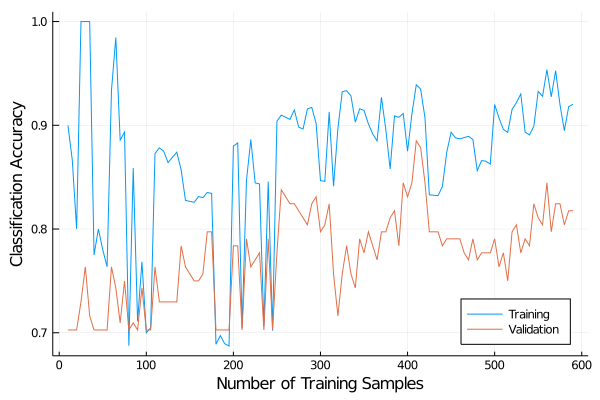

In [50]:
plot(data_schedule, training_losses, label="Training", legend=:bottomright)
plot!(data_schedule, valid_losses, label="Validation")
xlabel!("Number of Training Samples")
ylabel!("Classification Accuracy")

In [51]:
fn = "Figures/LearningCurve_DT_merge_purity_thresh:$(best_mpt)_loss:$(best_loss)"
png(replace(fn,'.' => ','))

# Final Results

In [53]:
final_dt = best.best_model

DecisionTreeClassifier(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = 0,
    post_prune = true,
    merge_purity_threshold = 0.5385477677677678,
    pdf_smoothing = 0.0,
    display_depth = 14) @700

In [54]:
Final_Tree = machine(final_dt, X_stand, y)

Machine{DecisionTreeClassifier} @819 trained 0 times.
  args: 
    1:	Source @159 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @644 ⏎ `AbstractArray{Multiclass{2},1}`


In [55]:
fit!(Final_Tree, rows=train, verbosity=2)

Feature 36, Threshold -0.12825137807558387
L-> Feature 27, Threshold 0.07521584446798363
    L-> Feature 34, Threshold 2.5
        L-> Feature 9, Threshold 3.5
            L-> Feature 10, Threshold 1.5
                L-> Feature 36, Threshold -0.3354530367869534
                    L-> Feature 9, Threshold 1.5
                        L-> Feature 18, Threshold 1.3981920479364356
                            L-> Feature 2, Threshold -0.19981745228355516
                                L-> 2 : 23/27
                                R-> Feature 15, Threshold -0.7127284361817541
                                    L-> Feature 13, Threshold -1.6671232271775904
                                        L-> 1 : 1/1
                                        R-> Feature 18, Threshold -0.1288613660477313
                                            L-> Feature 2, Threshold 0.03410631034868103
                                                L-> 2 : 3/4
                                                R->

┌ Info: Training Machine{DecisionTreeClassifier} @819.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{DecisionTreeClassifier} @819 trained 1 time.
  args: 
    1:	Source @159 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @644 ⏎ `AbstractArray{Multiclass{2},1}`


In [56]:
fitted_params(Final_Tree)

(tree = Decision Tree
Leaves: 27
Depth:  13,
 encoding = Dict{CategoricalValue{String,UInt32},UInt32}("RB" => 0x00000002,"NRB" => 0x00000001),)

In [57]:
ŷ = MLJ.predict(Final_Tree, X_stand[test,:]);

In [58]:
cross_entropy(ŷ, y[test]) |> mean

2.2492809689578297

In [59]:
acc(ŷ, y[test])

0.7886435331230284

In [60]:
c = confusion_matrix(mode.(ŷ), y[test])

┌ Warning: The classes are un-ordered,
│ using: negative='NRB' and positive='RB'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:83


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │     NRB     │     RB      │
├─────────────┼─────────────┼─────────────┤
│     NRB     │     175     │     32      │
├─────────────┼─────────────┼─────────────┤
│     RB      │     35      │     75      │
└─────────────┴─────────────┴─────────────┘


In [61]:
precision(c)

0.6818181818181819

In [62]:
recall(c)

0.7009345794392523

In [65]:
32/(35+72)

0.29906542056074764

In [66]:
35/(175+35)

0.16666666666666666